In [2]:
# importing all the necessary libraries

import pandas as pd 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [5]:
# Load the sales dataset
data = {
    'Age': [22, 25, 47, 52, 46, 56, 55, 60, 62, 61, 18, 28, 27, 32],
    'Income': [50000, 55000, 65000, 70000, 75000, 80000, 60000, 70000, 75000, 80000, 40000, 45000, 50000, 55000],
    'Purchase': [0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)
df.head(5)

,Age,Income,Purchase
0,22,50000,0
1,25,55000,1
2,47,65000,1
3,52,70000,0
4,46,75000,1


In [6]:
# splitting the data 

x = df[['Age' , 'Income']]
y = df['Purchase']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.20 , random_state=42)

In [7]:
# creating a decision tree classfiier

dt = DecisionTreeClassifier(criterion='gini' , max_depth=5 , min_samples_split=2 , min_samples_leaf=1 , random_state= 68)
dt.fit(x_train , y_train)
y_pred = dt.predict(x_test)

In [8]:
# Evaluating the decision tree classifier

print(f'Accuracy : {accuracy_score(y_test , y_pred)}')
print(f'Classification report : {classification_report(y_test , y_pred)}')
print(f'Confusion matrix : {confusion_matrix(y_test , y_pred)}')

Accuracy : 0.0
Classification report :               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

Confusion matrix : [[0 1]
 [2 0]]


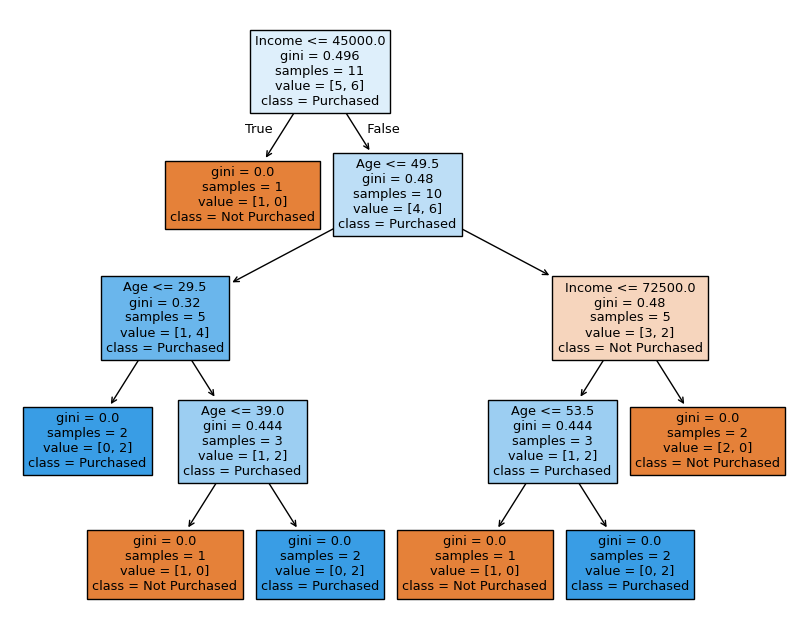

In [10]:
# Visualizing the decision tree 

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 

plt.figure(figsize=(10 , 8))
plot_tree(dt , feature_names = x.columns , class_names = ['Not Purchased' , 'Purchased'] , filled = True)
plt.show()

---
Here's a detailed explanation of the parameters in the Decision Tree Classifier:

**1. `criterion`**:
The `criterion` parameter determines the impurity measure used to split the data. There are two options:

* `gini`: This is the default criterion. It measures the impurity of a node by calculating the Gini index, which is a measure of the probability of misclassifying a sample.
* `entropy`: This criterion measures the impurity of a node by calculating the entropy, which is a measure of the uncertainty or randomness of the data.

Example:
```python
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini')
```
Significance: The choice of criterion affects the way the tree splits the data. Gini is a more conservative criterion, while entropy is more aggressive.

**2. `max_depth`**:
The `max_depth` parameter determines the maximum depth of the tree. A higher value allows the tree to grow deeper and capture more complex relationships in the data.

Example:
```python
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
```
Significance: Increasing the `max_depth` can lead to overfitting, while decreasing it can lead to underfitting.

**3. `min_samples_split`**:
The `min_samples_split` parameter determines the minimum number of samples required to split an internal node. A higher value requires more samples to split the node.

Example:
```python
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_split=2)
```
Significance: Increasing the `min_samples_split` can prevent overfitting by requiring more samples to split the node.

**4. `min_samples_leaf`**:
The `min_samples_leaf` parameter determines the minimum number of samples required to be at a leaf node. A higher value requires more samples to be at a leaf node.

Example:
```python
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_leaf=1)
```
Significance: Increasing the `min_samples_leaf` can prevent overfitting by requiring more samples to be at a leaf node.

**5. `min_weight_fraction_leaf`**:
The `min_weight_fraction_leaf` parameter determines the minimum weighted fraction of the sum total of samples required to be at a leaf node.

Example:
```python
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_weight_fraction_leaf=0.1)
```
Significance: Increasing the `min_weight_fraction_leaf` can prevent overfitting by requiring more weighted samples to be at a leaf node.

**6. `max_features`**:
The `max_features` parameter determines the maximum number of features to consider when looking for the best split.

Example:
```python
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_features='auto')
```
Significance: Increasing the `max_features` can lead to overfitting, while decreasing it can lead to underfitting.

**7. `random_state`**:
The `random_state` parameter determines the seed used to shuffle the data before splitting.

Example:
```python
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
```
Significance: Setting the `random_state` ensures reproducibility of the results.

**8. `class_weight`**:
The `class_weight` parameter determines the weight assigned to each class.

Example:
```python
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(class_weight='balanced')
```
Significance: Setting the `class_weight` can help to balance the classes and improve the performance of the model.

**9. `ccp_alpha`**:
The `ccp_alpha` parameter determines the complexity parameter used for pruning.

Example:
```python
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(ccp_alpha=0.0)
```
Significance: Increasing the `ccp_alpha` can lead to more aggressive pruning, while decreasing it can lead to less aggressive pruning.

When to use each:

* Use `gini` criterion when the classes are balanced and the data is not highly imbalanced.
* Use `entropy` criterion when the classes are highly imbalanced.
* Use a higher `max_depth` when the data is complex and has many features.
* Use a lower `max_depth` when the data is simple and has few features.
* Use a higher `min_samples_split` and `min_samples_leaf` when the data is noisy and has many outliers.
* Use a lower `min_samples_split` and `min_samples_leaf` when the data is clean and has few outliers.
* Use `max_features='auto'` when the data has many features and the model is prone to overfitting.
* Use `random_state` to ensure reproducibility of the results.

Here is the rest of the explanation:

**When to use each:**

* Use `class_weight='balanced'` when the classes are imbalanced and you want to give more weight to the minority class.
* Use `ccp_alpha=0.0` when you want to prune the tree aggressively and remove more nodes.
* Use `ccp_alpha=1.0` when you want to prune the tree less aggressively and remove fewer nodes.

**Example use cases:**

* Use a Decision Tree Classifier with `criterion='gini'` and `max_depth=5` to classify customers as either high-value or low-value based on their demographic data.
* Use a Decision Tree Classifier with `criterion='entropy'` and `max_depth=10` to classify images as either positive or negative based on their pixel values.
* Use a Decision Tree Classifier with `class_weight='balanced'` and `ccp_alpha=0.5` to classify text as either spam or not spam based on its content.

**Advantages and disadvantages:**

* Advantages:
	+ Easy to interpret and visualize
	+ Can handle both categorical and numerical data
	+ Can handle missing values
	+ Fast training and prediction times
* Disadvantages:
	+ Can overfit the data if not regularized
	+ Can be sensitive to the choice of hyperparameters
	+ Can be less accurate than other models for complex data

**Regularization techniques:**

* Pruning: removing nodes from the tree to reduce overfitting
* Early stopping: stopping the training process when the model's performance on the validation set starts to degrade
* L1 and L2 regularization: adding a penalty term to the loss function to discourage large weights

**Hyperparameter tuning:**

* Grid search: trying out all possible combinations of hyperparameters and selecting the best one
* Random search: trying out a random subset of hyperparameters and selecting the best one
* Bayesian optimization: using a probabilistic approach to search for the optimal hyperparameters

**Real-world applications:**

* Customer segmentation: using Decision Trees to classify customers into different segments based on their demographic and behavioral data
* Image classification: using Decision Trees to classify images into different categories based on their pixel values
* Text classification: using Decision Trees to classify text into different categories based on its content
* Recommendation systems: using Decision Trees to recommend products or services to customers based on their past behavior and preferences.